In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
glass = pd.read_csv("C:/Users/Jeswyn Moses. A/Desktop/ExcelR/Assignments/DATA SCIENCE ASSIGNMENTS/Assignments/13. KNN/glass.csv")

In [16]:
glass.size

2140

In [3]:
glass.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Data Prepocessing
Evaluate the missing values and duplicates

Set the features and target

Check data type

Train-Test-Split

In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
glass.groupby('Type')['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba', 'Fe'].mean()

C:\ANACONDAPython\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


C:\ANACONDAPython\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ANACONDAPython\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ANACONDAPython\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


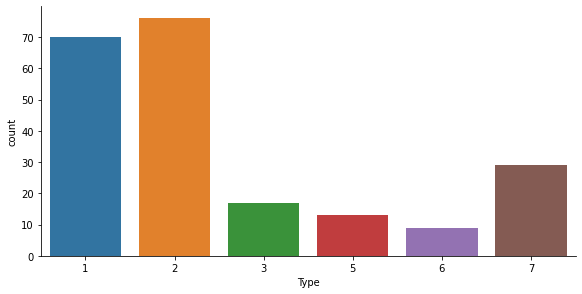

In [13]:
sns.factorplot('Type', data=glass, kind="count", size = 4, aspect = 2)

In [15]:
glass.dropna()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
duplicates = glass.duplicated()
duplicates[duplicates > 1]

Series([], dtype: bool)

In [18]:
##train_test_split
from sklearn.model_selection import train_test_split
x = glass.iloc[:,0:9]
y = glass.iloc[:,9]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

# 3. Training and testing the data
Decision Tree

Random Forest

Perceptron

Support Vector Machine

K-Nearest Neighbors

In [19]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=07c23313398ab5e3e90ebb3b5f1d337d9a89e56fc2420deefef34bbb1f668d23
  Stored in directory: C:\Users\Jeswyn Moses. A\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Decision_Tree

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Declare and train the model
clf = DecisionTreeClassifier(random_state = 0, criterion='gini')
clf.fit(x_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(x_test)

scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
a=scores.append(score)

In [ ]:
#cross_val_score 
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(clf, X,y, cv=10)
score_tree

In [ ]:

cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

# 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
scores.append(score)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#Get cross validation score of random forest model
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

# Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

# Declare the model
clf = Perceptron(tol=1e-3, eta0=0.1, random_state=0)

# Train the model
clf.fit(X_train, y_train)
y_pred_Perceptron = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_Perceptron,y_test)
scores.append(score)

In [ ]:
#Get cross validation score of Perceptron
score_perceptron=cross_val_score(clf, X,y, cv=10)
score_perceptron
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_perceptron.mean(), score_perceptron.std() * 2))
cv_score = score_perceptron.mean()
cv_scores.append(cv_score)

# 4) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Declare the model
svm = SVC(kernel='linear', C=0.2, random_state=0)

# Train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Get Accuracy Score
score = accuracy_score(y_pred_svm,y_test)
scores.append(score)

In [ ]:
#Get cross validation score of Support Vector Machine
score_svm=cross_val_score(svm, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [ ]:
#Get cross validation score of K-Nearest Neighbors
score_knn=cross_val_score(clf, X,y, cv=10)
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
cv_score = score_knn.mean()
cv_scores.append(cv_score)


#  Accuracy Score

In [ ]:
# Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores = pd.Series(scores, ['Decision tree','Perceptron', 'Random forest','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()


# Cross Validation Score

In [ ]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores = pd.Series(cv_scores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_scores.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()


# conclusion:- As i got  K-Nearest Neighbors Accuracy:0.27 accuracy score and 0.65 of cross validation.
